# Importing neccessary libs

In [1]:
import os
import tarfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
PATH = 'dataset'

# EDA

In [3]:
arch = tarfile.open(os.path.join('..', PATH, 'part1.tar.gz'), 'r')
arch.getnames()

['part1/2_1_2_20161219202547820.jpg',
 'part1/77_1_0_20170110122639530.jpg',
 'part1/1_1_0_20170109190844250.jpg',
 'part1/29_1_2_20170105164315483.jpg',
 'part1/76_1_0_20170110131744527.jpg',
 'part1/50_1_0_20170110154254311.jpg',
 'part1/2_1_2_20161219152918020.jpg',
 'part1/5_1_0_20170109194229104.jpg',
 'part1/81_1_2_20170105174804349.jpg',
 'part1/30_0_0_20170105164847516.jpg',
 'part1/37_1_0_20170104171729234.jpg',
 'part1/17_0_0_20170104003852806.jpg',
 'part1/46_0_3_20170104210508188.jpg',
 'part1/32_1_3_20170104223515310.jpg',
 'part1/5_1_2_20161219151834275.jpg',
 'part1/32_0_4_20170105163336092.jpg',
 'part1/1_1_4_20170103210113314.jpg',
 'part1/8_1_0_20170109203557851.jpg',
 'part1/38_0_2_20170104194407752.jpg',
 'part1/1_0_2_20161219155850477.jpg',
 'part1/15_0_0_20170110232515682.jpg',
 'part1/8_0_0_20170110222913531.jpg',
 'part1/30_1_0_20170104165921257.jpg',
 'part1/15_1_2_20170104013425867.jpg',
 'part1/5_1_2_20161219200433267.jpg',
 'part1/1_0_2_20161219212229166.jpg

In [4]:
p1_path = arch.getnames()[0].split('/')[0]
p1_path += '/'

## Illustrate data

age [2], gender[1], race [2]
age [77], gender[1], race [0]
age [1], gender[1], race [0]


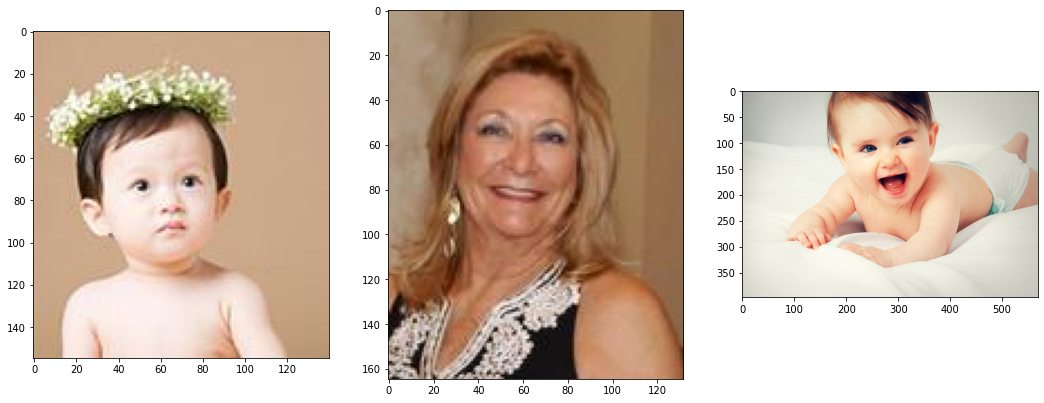

In [5]:
fig, axs = plt.subplots(1,3, figsize= (18,7))

cnt = 0
for name in arch.getnames():
    extrd_file = arch.extractfile(name)
    img = Image.open(extrd_file)

    age = name.split('_')[0].replace(p1_path, '')
    gender = name.split('_')[1]
    race = name.split('_')[2]

    print(f'age [{age}], gender[{gender}], race [{race}]')
    axs[cnt].imshow(img)

    if cnt == 2:
        break

    cnt += 1
    

## Collect some metrics

In [28]:
f_names = []
shapes_arr = []
ages_arr = []
races_arr = []
genders_arr = []

for name in arch.getnames():
    extrd_file = arch.extractfile(name)
    if extrd_file != None:
        img = Image.open(extrd_file)

        f_names.append(name)
        shapes_arr.append(img.size)
        ages_arr.append(name.split('_')[0].replace(p1_path, ''))
        genders_arr.append(name.split('_')[1])
        races_arr.append(name.split('_')[2])

print(f'{len(f_names)}/{len(arch.getnames())} read\nLengths: shapes {len(shapes_arr)}, ages {len(ages_arr)}, races {len(races_arr)}, genders {len(genders_arr)}')

10137/10138 read
Lengths: shapes 10137, ages 10137, races 10137, genders 10137


In [29]:
np.unique(races_arr)

array(['0', '1', '2', '20170109142408075.jpg', '20170109150557335.jpg',
       '3', '4'], dtype='<U21')

In [30]:
rem_indxs = [races_arr.index('20170109142408075.jpg'), races_arr.index('20170109150557335.jpg')]

races_arr.remove('20170109142408075.jpg')
races_arr.remove('20170109150557335.jpg')


In [31]:
np.unique(races_arr)

array(['0', '1', '2', '3', '4'], dtype='<U1')

In [32]:
del shapes_arr[rem_indxs[0]]
del shapes_arr[rem_indxs[1]]

del ages_arr[rem_indxs[0]]
del ages_arr[rem_indxs[1]]

del genders_arr[rem_indxs[0]]
del genders_arr[rem_indxs[1]]

del f_names[rem_indxs[0]]
del f_names[rem_indxs[1]]

In [33]:
ages_arr = np.array(ages_arr, dtype= np.int32)
np.unique(ages_arr)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  95,  96,  99, 100, 101, 110])

In [34]:
shapes_arr[:5]

[(140, 155), (132, 165), (569, 398), (364, 455), (700, 525)]

In [13]:
np.unique(genders_arr)

array(['0', '1'], dtype='<U1')

In [14]:
print(f'{len(f_names)}/{len(arch.getnames())} after cleaning\nLengths: shapes {len(shapes_arr)}, ages {len(ages_arr)}, races {len(races_arr)}, genders {len(genders_arr)}')

10135/10138 after cleaning
Lengths: shapes 10135, ages 10135, races 10135, genders 10135


d:\Projects\Python\Faces_UTK\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Shapes')

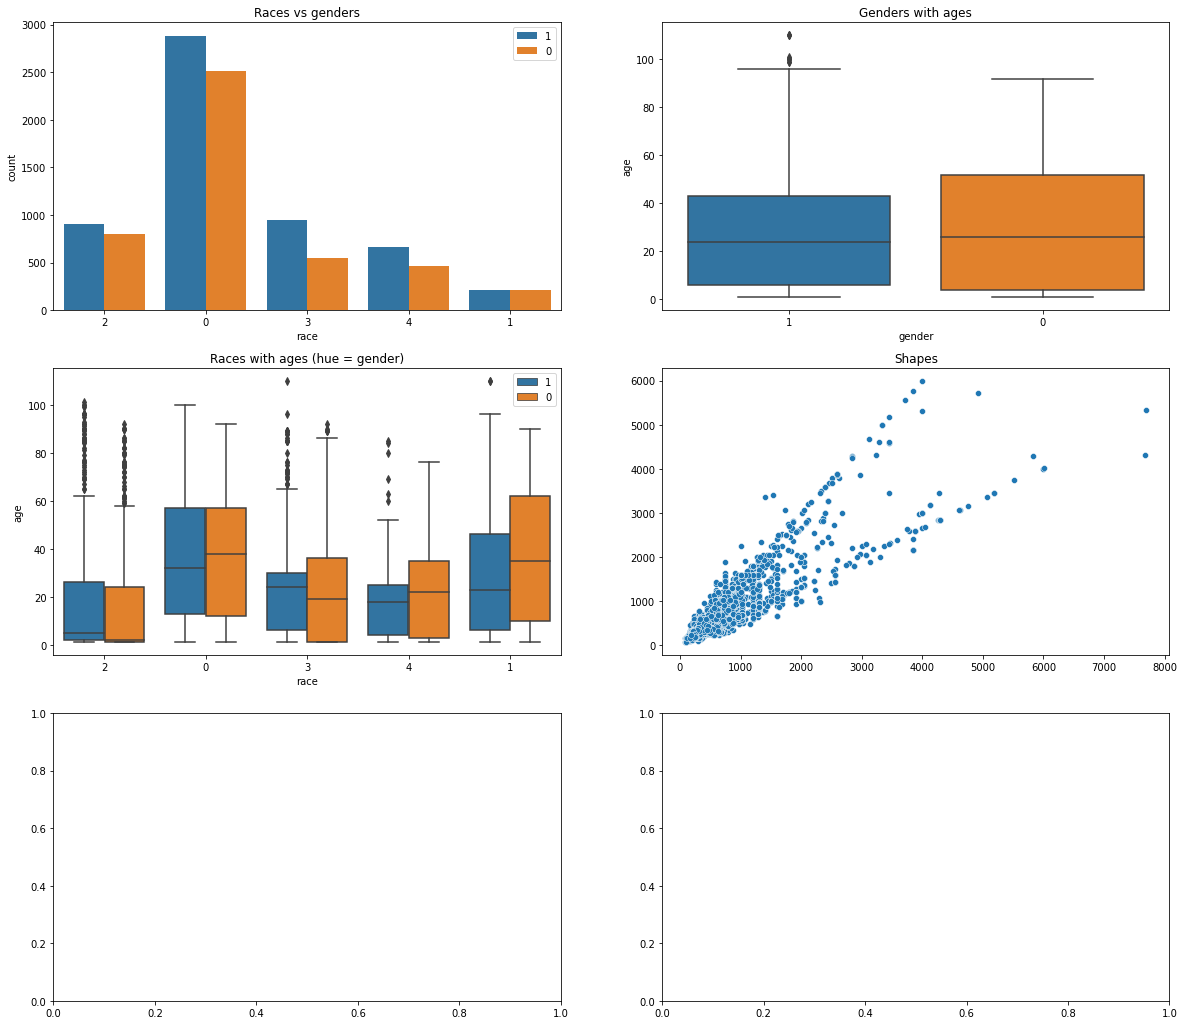

In [48]:
fig, axs = plt.subplots(3,2, figsize= (20,18))

sns.countplot(x= races_arr, hue= genders_arr, ax= axs[0][0])
axs[0][0].set_xlabel('race')
axs[0][0].set_title('Races vs genders')

sns.boxplot(x= genders_arr, y= ages_arr, ax= axs[0][1])
axs[0][1].set_xlabel('gender')
axs[0][1].set_ylabel('age')
axs[0][1].set_title('Genders with ages')

sns.boxplot(x= races_arr, y= ages_arr, hue= genders_arr, ax= axs[1][0])
axs[1][0].set_xlabel('race')
axs[1][0].set_ylabel('age')
axs[1][0].set_title('Races with ages (hue = gender)')

sns.scatterplot(*zip(*shapes_arr), ax = axs[1][1])
axs[1][1].set_title('Shapes')

10137